Longitud:  134
       ra               dec         ...      specobjid       run2d 
---------------- ------------------ ... ------------------- -------
165.888114296596 -0.787257826795205 ... 4248180690250604544 v5_10_0
165.870074220494 -0.958742073160432 ... 4248182614395953152 v5_10_0
165.896657151589  -1.02245976924706 ... 4248182339518046208 v5_10_0
165.924305594328 -0.939347085147873 ... 4248182064640139264 v5_10_0
166.077893671431 -0.956786300626142 ... 4248193059756417024 v5_10_0
****************************************************************************************************

Z REDSHIFT
 3.352628e-05
Descargado

****************************************************************************************************
redshift observado para H alfa: 6563.22003297564
****************************************************************************************************
       ra               dec         ...      specobjid       run2d 
---------------- ------------------ ... -----------

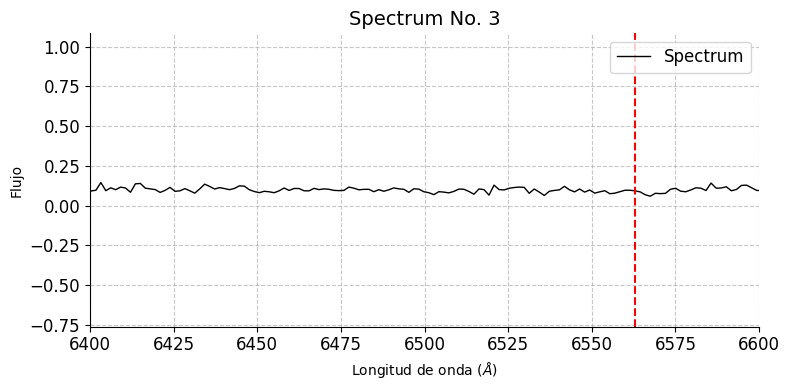

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u
import h5py


# Definir función gaussiana para el ajuste
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Función para medir la velocidad radial
def medir_velocidad_radial(wavelength, flux, lambda_conocida):
    # Ajustar la línea de Hα utilizando la función gaussiana
    popt, _ = curve_fit(gaussian, wavelength, flux, p0=[np.max(flux), lambda_conocida, 2.0])

    # Obtener la posición del pico ajustado de la línea Hα
    lambda_observada = popt[1]

    # Calcular el corrimiento al rojo o al azul
    corrimiento = (lambda_observada - lambda_conocida) / lambda_conocida

    # Velocidad de la luz en km/s
    c_km_s = 3e5

    # Calcular la velocidad radial en km/s
    velocidad_radial = corrimiento * c_km_s

    return velocidad_radial

def normalize_spectrum(flux):
    # Normalize the flux by dividing by the maximum value
    max_flux = max(flux)
    normalized_flux = flux / max_flux
    return normalized_flux

def plot_spectra(wavelength, flux, spectrum_info=''):
    # Configuración de los gráficos
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(wavelength, flux, '-k', lw=1)
    ax.set_xlim(np.min(wavelength), np.max(wavelength))
    ax.set_xlim(6400, 6600)
    ax.set_xlabel(r'Longitud de onda $(\AA)$')
    ax.set_ylabel(r'Flujo')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Customize plot appearance
    ax.set_title("Spectrum " + spectrum_info, fontsize=14)
    ax.tick_params(labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(["Spectrum"], loc='upper right', fontsize=12)

    # Add vertical line at 6563 Å
    ax.axvline(x=6563, color='red', linestyle='--', label='Hα line')

    plt.tight_layout()
    plt.show()

def descargaxId(ra, dec, radius=10):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    print("Longitud: ",len(xid))
    print(xid[:5])
    return xid

def descargar_y_visualizar_espectro(ra, dec, radius=10, n_spec=0, save_to_file=None):
    # Crear una coordenada SkyCoord a partir de las coordenadas RA y Dec en grados
    pos = coords.SkyCoord(ra*u.deg, dec*u.deg, frame='icrs')
    # Buscar el espectro utilizando astroquery
    xid = SDSS.query_region(pos, spectro=True, radius=radius*u.arcsec)
    xid=xid[xid["z"]<0.01]
    redshiftZ= xid[n_spec]["z"]
    redshiftZObservado=6563*(1+redshiftZ)
    print("*"*100)
    print("\nZ REDSHIFT\n", xid[n_spec]["z"])
    print("Descargado\n")
    print("*"*100)
    print("redshift observado para H alfa:", redshiftZObservado)
    print("*"*100)
    print(xid[:4])
    # Descargar el espectro
    if xid is not None and len(xid) > 0:
        j_spectra = SDSS.get_spectra(matches=xid)
        print(j_spectra[nspec])
        # Check if there are enough spectra available
        if len(j_spectra) > n_spec:
            spectrum = j_spectra[n_spec]
            flux = spectrum[1].data['flux']
            flux = normalize_spectrum(flux)
            wavelength = 10 ** spectrum[1].data['loglam']  # Convertir log(lambda) a lambda
            ##############################################################################
            
            # Visualizar el espectro
            plot_spectra(wavelength, flux, spectrum_info=f"No. {n_spec}")

            # Guardar los datos del espectro en un archivo HDF5 si se especificó
            if save_to_file:
                with h5py.File(save_to_file, 'w') as hf:
                    hf.create_dataset('wavelength', data=wavelength)
                    hf.create_dataset('flux', data=flux)

            return xid, j_spectra
        else:
            print(f"No hay suficientes espectros disponibles para el número especificado: {n_spec}")
            return None, None
    else:
        print("No se encontró un espectro para las coordenadas proporcionadas.")
        return None, None

if __name__ == "__main__":
    # Coordenadas RA y Dec de la estrella (ejemplo)
    ra = 166.08171
    dec = -0.88486

    # Llamada a la función para descargar y visualizar el espectro

nspec=3
radius=100
xid = descargaxId(ra, dec, radius=1000)
xidDescargado, j_spectra = descargar_y_visualizar_espectro(ra, dec, radius=1000, n_spec=nspec, save_to_file='spectrum_'+str(xid[nspec]["objid"])+'_RA'+str(ra)+'_DEC'+str(dec)+'_'+str(nspec)+'.hdf5')




In [27]:

xidDescargado

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
float64,float64,int64,int32,int32,int32,int32,float64,int32,int32,int32,int64,bytes7
165.924305594328,-0.939347085147873,1237648720150856023,756,301,1,335,-0.0003994612,3773,55240,588,4248182064640139264,v5_10_0
165.924305594328,-0.939347085147873,1237648720150856023,756,301,1,335,1.155002,3836,55302,86,4318975771102126080,v5_10_0


In [76]:
# Obtener el espectro específico
from astropy.io import fits
fits.info(j_spectra)


OSError: File-like object does not have a 'write' method, required for mode 'ostream'.

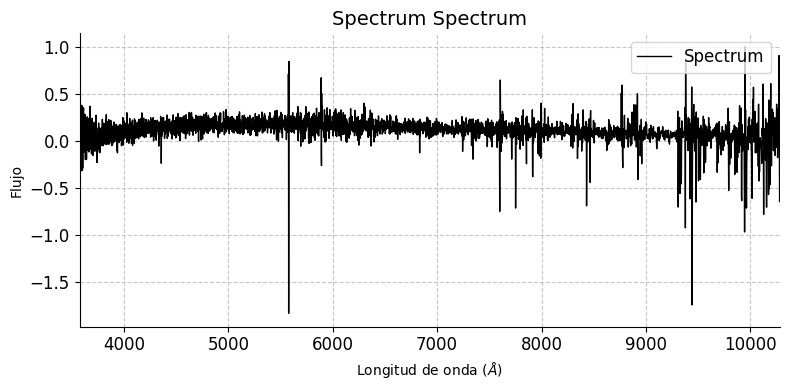

In [63]:
import h5py
import matplotlib.pyplot as plt

def plot_spectra_from_hdf5(file_path):
    with h5py.File(file_path, 'r') as hf:
        # Read the wavelength and flux data from the HDF5 file
        wavelength = hf['wavelength'][:]
        flux = hf['flux'][:]

    # Plot the spectrum
    plot_spectra(wavelength, flux, spectrum_info='Spectrum')

# File path of the HDF5 file
file_path = 'spectrum_0.hdf5'

# Call the function to plot the spectrum from the HDF5 file
plot_spectra_from_hdf5(file_path)

# Show the plot
plt.show()


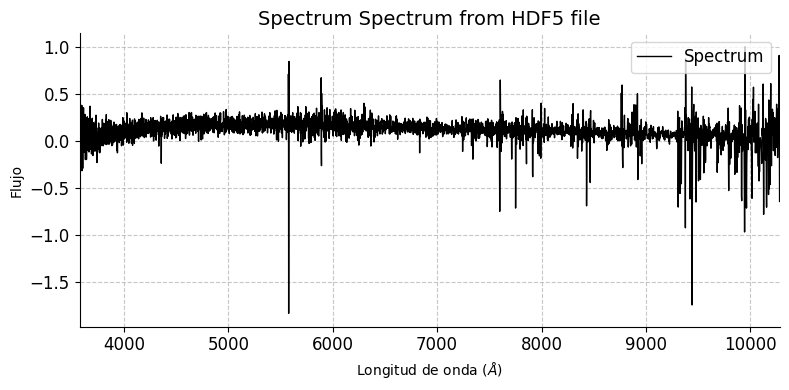

In [64]:
import h5py

def normalize_spectrum(flux):
    # Normalize the flux by dividing by the maximum value
    max_flux = max(flux)
    normalized_flux = flux / max_flux
    return normalized_flux

def plot_spectra_from_hdf5(file_path):
    with h5py.File(file_path, 'r') as hf:
        # Read the wavelength and flux data from the HDF5 file
        wavelength = hf['wavelength'][:]
        flux = hf['flux'][:]

        # Normalize the flux
        normalized_flux = normalize_spectrum(flux)

    # Plot the spectrum
    plot_spectra(wavelength, normalized_flux, spectrum_info='Spectrum from HDF5 file')

# File path of the HDF5 file
file_path = 'spectrum_0.hdf5'

# Call the function to plot the normalized spectrum from the HDF5 file
plot_spectra_from_hdf5(file_path)

# Show the plot
plt.show()


In [66]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Coordenadas en formato "11:00:19.61 -00:53:05.5"
coord_str = "11:00:19.61 -00:53:05.5"

# Convertir a SkyCoord
coord = SkyCoord(coord_str, unit=(u.hourangle, u.deg))

# Obtener las coordenadas en grados
ra_deg = coord.ra.deg
dec_deg = coord.dec.deg

print(f"RA: {ra_deg:.5f} deg, Dec: {dec_deg:.5f} deg")


RA: 165.08171 deg, Dec: -0.88486 deg
